## Imports 

In [2]:
import pandas as pd
import os
import matplotlib.pyplot as plt

from Constants import DATASET_DIRECTORY, y_columns, dict_2classes, dict_7classes

## Import Dataset

In [3]:
df_sets = [k for k in os.listdir(DATASET_DIRECTORY) if k.endswith('.csv')]
df_sets.sort()
training_set = df_sets[0]
data = pd.read_csv(DATASET_DIRECTORY + training_set)

## Pre Processing

In [4]:
new_y = [dict_7classes[k] for k in data[y_columns[0]]]
data[y_columns[1]] = new_y
new_y = [dict_2classes[k] for k in data[y_columns[0]]]
data[y_columns[2]] = new_y

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 238687 entries, 0 to 238686
Data columns (total 49 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   flow_duration    238687 non-null  float64
 1   Header_Length    238687 non-null  float64
 2   Protocol Type    238687 non-null  float64
 3   Duration         238687 non-null  float64
 4   Rate             238687 non-null  float64
 5   Srate            238687 non-null  float64
 6   Drate            238687 non-null  float64
 7   fin_flag_number  238687 non-null  float64
 8   syn_flag_number  238687 non-null  float64
 9   rst_flag_number  238687 non-null  float64
 10  psh_flag_number  238687 non-null  float64
 11  ack_flag_number  238687 non-null  float64
 12  ece_flag_number  238687 non-null  float64
 13  cwr_flag_number  238687 non-null  float64
 14  ack_count        238687 non-null  float64
 15  syn_count        238687 non-null  float64
 16  fin_count        238687 non-null  floa

## Data Visualisation

In [29]:
value_counts = data[y_columns[0]].value_counts()
df = pd.DataFrame(value_counts/238687*100)

other = 0
for index, row in df.iterrows():
    if(index != 'BenignTraffic' and row['count'] < 5):
        other += row['count']

data_to_add = {'label' : 'Other', 'count' : other}

df.loc['Other'] = data_to_add

df = df[df['count'] >= 5]

df.loc['BenignTraffic'] = 2.346169
df

,count
label,
DDoS-ICMP_Flood,15.314617
DDoS-UDP_Flood,11.574154
DDoS-TCP_Flood,9.698475
DDoS-PSHACK_Flood,8.886114
DDoS-SYN_Flood,8.688785
DDoS-RSTFINFlood,8.659458
DDoS-SynonymousIP_Flood,7.620440
DoS-UDP_Flood,7.104283
DoS-TCP_Flood,5.710407


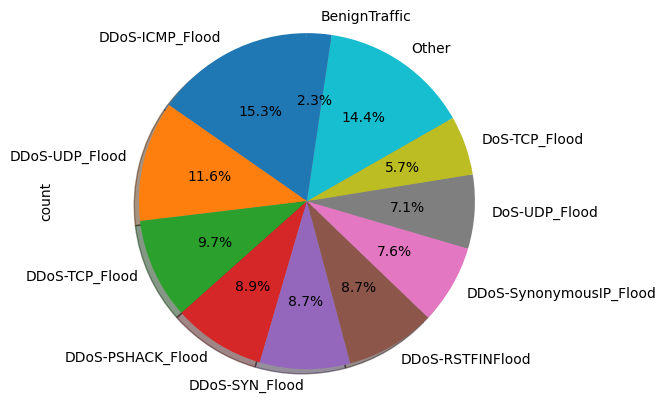

In [33]:
df.plot(kind='pie', y='count', autopct='%1.1f%%', startangle=90, shadow=True)
plt.axis('equal')  # Equal aspect ratio ensures that the pie chart is circular
plt.gca().get_legend().remove()
plt.savefig('plots/pie_chart.png')
plt.show()

AttributeError: 'NoneType' object has no attribute 'remove'

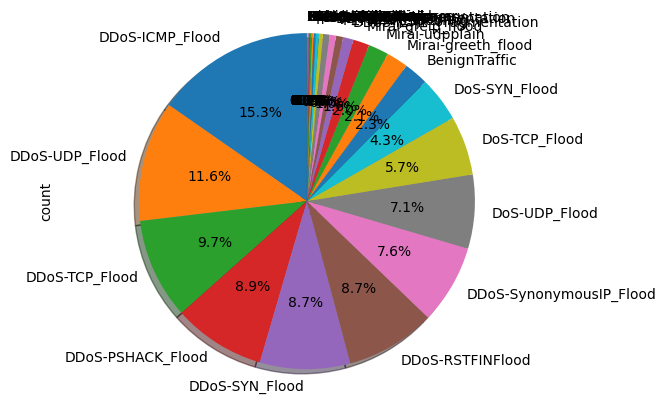

In [32]:
for column in y_columns:
    value_counts = data[column].value_counts()
    value_counts.plot(kind='pie', autopct='%1.1f%%', startangle=90, shadow=True)
    plt.axis('equal')  # Equal aspect ratio ensures that the pie chart is circular
    plt.savefig('plots/pie_chart' + column + '.png')
    plt.gca().get_legend().remove()
    plt.show()